# Pymaceuticals Inc.
---

### Analysis

- From our multiple calculations we can determine that the Capomulin and Ramicane regimens have the best success in reducing the size of tumors
- In this sample there were a total of 248 mice with 124 being female and 125 being male. 
- There does exist a strong coorelation between a mouse's weight and the volume of tumor. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Combine the data into a single dataset
combo_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combo_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
num_of_mice = combo_df["Mouse ID"].nunique()
num_of_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = combo_df.loc[combo_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combo_df[combo_df["Mouse ID"].isin(dup_data)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
num_clean = clean_df["Mouse ID"].nunique()
num_clean

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#Calculates the mean Tumor Volume value for each category of drugs 
mean_tumor_vol = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
mean_tumor_vol

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Calculates the median Tumor Volume value for each category of drugs 
median_tumor_vol = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
median_tumor_vol

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Calculates the variance Tumor Volume value for each category of drugs 
var_tumor_vol = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
var_tumor_vol

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Calculates the standard deviation Tumor Volume value for each category of drugs 
std_tumor_vol = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
std_tumor_vol

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Calculates the standard error Tumor Volume value for each category of drugs 
sem_tumor_vol = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()
sem_tumor_vol

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [16]:
#Creating dataframe that loads in all previously calculated values

sum_stat_table = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol, 
                              "Median Tumor Volume": median_tumor_vol, 
                              "Tumor Volume Variance": var_tumor_vol, 
                              "Tumor Volume Std. Dev.": std_tumor_vol, 
                              "Tumor Volume Std. Err.": sem_tumor_vol})
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
sum_stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line.
sum_stat_table2 = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
sum_stat_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

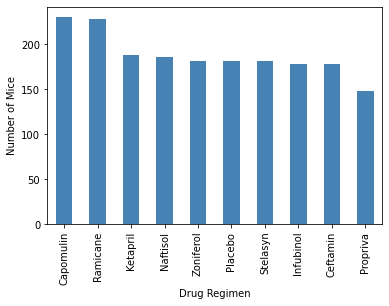

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#store the data in a variable
mice_test_count = clean_df["Drug Regimen"].value_counts()
#using pandas to plot
plt1 = mice_test_count.plot.bar(color = "steelblue")
#creating labels for axis
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

<function matplotlib.pyplot.show(close=None, block=None)>

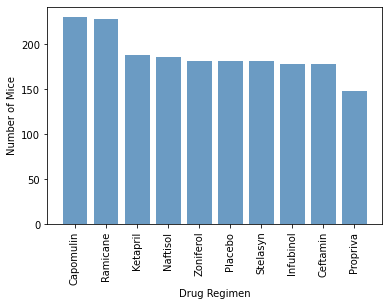

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#assign values to axis
x_axis = mice_test_count.index.values
y_axis = mice_test_count.values
#create plot using pyplot
plt.bar(x_axis, y_axis, color = "steelblue", alpha = 0.8, align = "center")
# create labels for plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation = "vertical")

plt.show

<AxesSubplot:ylabel='Sex'>

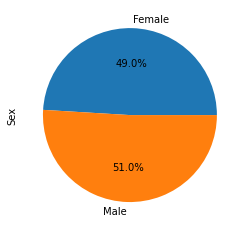

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_df.groupby(["Sex"])["Sex"].count()
sex_count.plot.pie(autopct = "%1.1f%%")

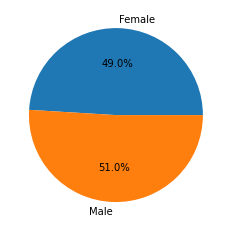

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count.values, labels=sex_count.index.values,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
greatest_tp = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tp = greatest_tp.reset_index()

In [24]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_tum_vol = pd.merge(greatest_tp, clean_df, on = ["Mouse ID", "Timepoint"], how = "left")
merge_tum_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
all_regs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in all_regs:     
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tum_vol = merge_tum_vol.loc[merge_tum_vol["Drug Regimen"]== i, "Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_data.append(tum_vol)    
    # Determine outliers using upper and lower bounds
    quarts = tum_vol.quantile([.25, .5, .75])
    lq = quarts[0.25]
    uq = quarts[0.75]
    iqr = uq-lq
    lb = lq - (1.5*iqr)
    ub = uq + (1.5*iqr)
    outleir = tum_vol.loc[(tum_vol < lb) | (tum_vol > ub)]
    
    print(f"{i} Regimen statistics: \n", 
         f"Lower Quartile: {lq} \n", 
         f"Higher Quartile: {uq}\n", 
         f"IQR: {iqr} \n" ,
         f"Lower Bound: {lb} mm3 \n", 
         f"Upper Bound: {ub} mm3 \n", 
         f"Number of Outleirs: {outleir.count()} \n")
    
    
    if outleir.count() > 0:
        for y in outleir.index:
            print(f"The outleir is {outleir[y]} \n")
    

Capomulin Regimen statistics: 
 Lower Quartile: 32.37735684 
 Higher Quartile: 40.1592203
 IQR: 7.781863460000004 
 Lower Bound: 20.70456164999999 mm3 
 Upper Bound: 51.83201549 mm3 
 Number of Outleirs: 0 

Ramicane Regimen statistics: 
 Lower Quartile: 31.56046955 
 Higher Quartile: 40.65900627
 IQR: 9.098536719999998 
 Lower Bound: 17.912664470000003 mm3 
 Upper Bound: 54.30681135 mm3 
 Number of Outleirs: 0 

Infubinol Regimen statistics: 
 Lower Quartile: 54.04860769 
 Higher Quartile: 65.52574285
 IQR: 11.477135160000003 
 Lower Bound: 36.83290494999999 mm3 
 Upper Bound: 82.74144559000001 mm3 
 Number of Outleirs: 1 

The outleir is 36.3213458 

Ceftamin Regimen statistics: 
 Lower Quartile: 48.72207785 
 Higher Quartile: 64.29983003
 IQR: 15.577752179999997 
 Lower Bound: 25.355449580000002 mm3 
 Upper Bound: 87.66645829999999 mm3 
 Number of Outleirs: 0 



{'whiskers': [<matplotlib.lines.Line2D at 0x17fc0569d60>,
 'caps': [<matplotlib.lines.Line2D at 0x17fc0597970>,
 'boxes': [<matplotlib.lines.Line2D at 0x17fc0cfd3a0>,
 'medians': [<matplotlib.lines.Line2D at 0x17fc0597370>,
 'fliers': [<matplotlib.lines.Line2D at 0x17fc0598430>,
 'means': []}

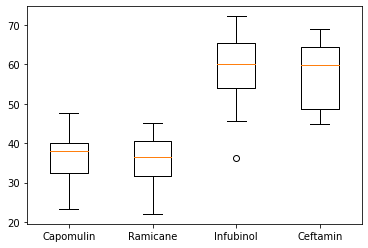

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels= all_regs)



## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Timepoint for Mouse: b128')

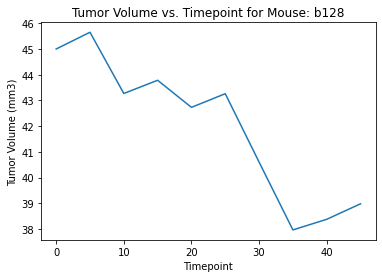

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mice = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
mouse = cap_mice.loc[clean_df["Mouse ID"] == "b128"]
x = mouse["Timepoint"]
y = mouse["Tumor Volume (mm3)"]
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x,y)
plt.title("Tumor Volume vs. Timepoint for Mouse: b128")


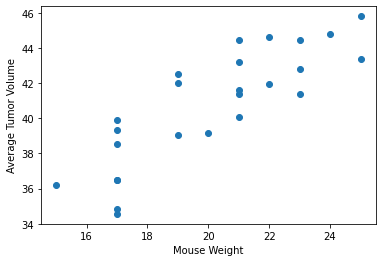

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avg = cap_mice.groupby("Mouse ID").mean()
x = cap_avg["Weight (g)"]
y = cap_avg["Tumor Volume (mm3)"]
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.scatter(x,y)


## Correlation and Regression

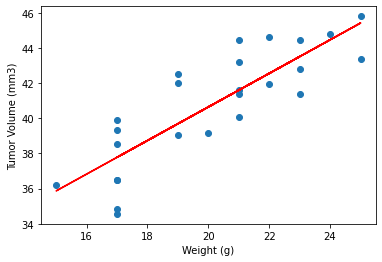

In [44]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = cap_avg["Weight (g)"]
y = cap_avg["Tumor Volume (mm3)"]
coorelation = st.pearsonr(x,y)[0]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regression_values = x * slope + intercept
line = f"y = {slope}x + {intercept}"
plt.plot(x,regression_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x,y)